In [3]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

# Mathematical Concepts

## Example 1. Visualizing Natural numbers

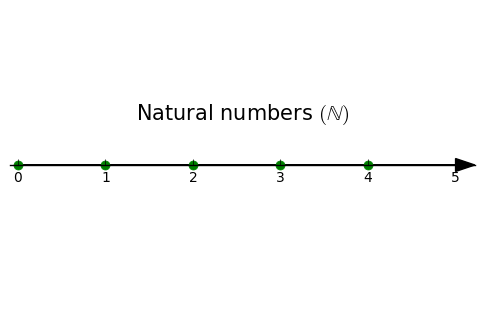

In [462]:
def plot_xaxis(n, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    y = np.zeros(n)

    x = np.linspace(0, n-1, n)
    p1 = plt.plot(x, y, 'go', markeredgecolor='g', markersize=6.5)
    ax.arrow(0, 0, n, 0, fc='k', ec='k', width=0.0001, head_width=0.005, head_length=0.22)
    plt.xlabel(title, fontsize=15)
    ax.xaxis.set_label_coords(0.5, 0.7) 
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('none')

    ax.spines["bottom"].set_position("center")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_color("none")

    #empty list
    ax.get_yaxis().set_visible(False) 
    #ax.get_yaxis().set_ticks([])  #other way to hide ticks

    #new_yticks = [i for i in ax.get_yticks()[0:] if i != 0]
    #ax.set_xticks(ax.get_xticks()[])

    ax.set_xlim([-0.09,n+0.222])
    plt.show()
    
plot_xaxis(5, "Natural numbers $(\mathbb{N})$")

## Example 2. Visualizing Complex Numbers

Given the magnitude and argument of a complex number, write the (x, y) coordinates and visualize the vector which it corresponds to. To find $x, y$ we can use the formulas $x = rcos(\theta)$ and $y = rsin(\theta)$.

x=1.0000000000000002	y=1.0


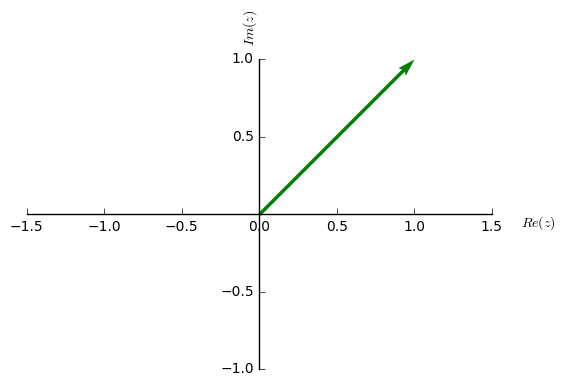

x=0.7071067811865477	y=-1.2247448713915892


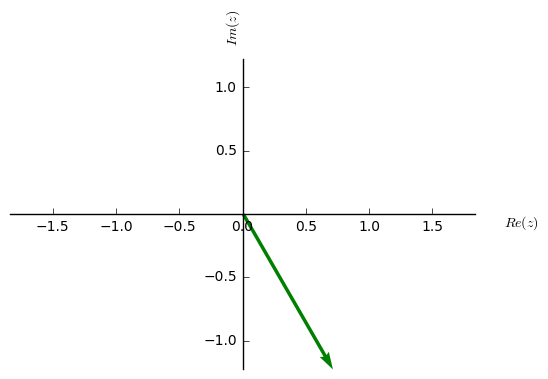

x=6.123233995736766e-17	y=1.0


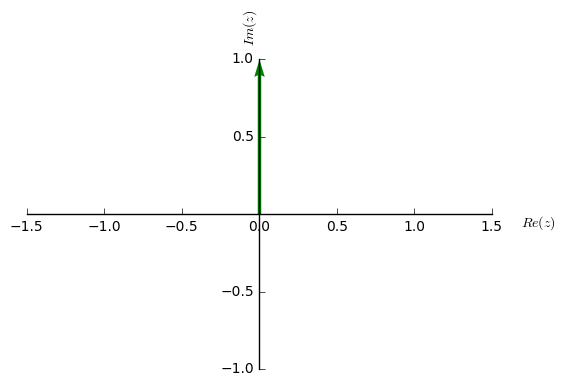

x=-1.0	y=1.2246467991473532e-16


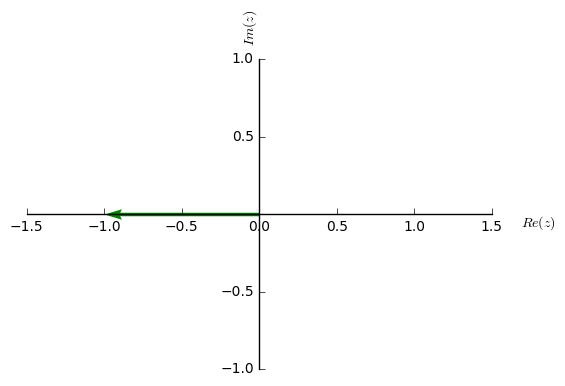

In [243]:
def get_rect_coords(r, theta):
    x = r * math.cos(theta)
    y = r * math.sin(theta)
    return (x, y)

def plot_complex_number(x, y):
    print("x={}\ty={}".format(x,y))
    ax = plt.axes()
    plt.axis("equal")
    #     ax.arrow(0, 0, x, y, head_width=0.07, head_length=0.2, fc='r', ec='r')
    # plt.quiver(x, y, u, v, np.arctan2(v, u), angles='xy', scale_units='xy', scale=1, pivot='mid',color='g')
    ax.quiver(0, 0, x, y, units = "xy", scale = 1, color='g')
    lim = max(1.5 * abs(x), 1.5 * abs(y))
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    
    #labels setup
    ax.set_xlabel(r"$Re(z)$")
    ax.set_ylabel(r"$Im(z)$")
    ax.xaxis.set_label_coords(1.1, 0.5) 
    ax.yaxis.set_label_coords(0.5, 1.1) 
    
    ax.spines["left"].set_position("center")
    ax.spines["bottom"].set_position("center")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    
    #ax.spines['left'].set_smart_bounds(True)
    #ax.spines['bottom'].set_smart_bounds(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    #remove 0.0 from the y-axes
    new_yticks = [i for i in ax.get_yticks()[0:] if i != 0]
    ax.set_yticks(new_yticks)
    
    plt.show()

def visualize_complex_number(r, theta):
    (x, y) = get_rect_coords(r, theta)
    plot_complex_number(x, y)
    

visualize_complex_number(math.sqrt(2), math.pi / 4)
visualize_complex_number(math.sqrt(2), -math.pi / 3)
visualize_complex_number(1, math.pi / 2)
visualize_complex_number(1, math.pi)


## Example 3. Polar Coordinates

Plotting the following functions:

$r = \sin(\theta) \\
r = 1 +\sin(\theta) \\
r = \theta^2$


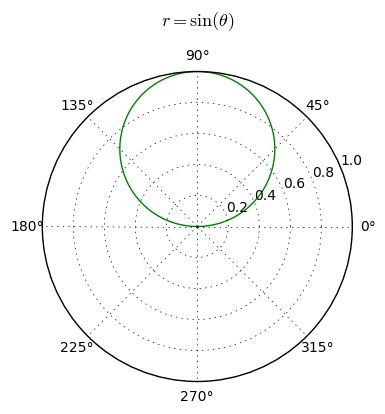

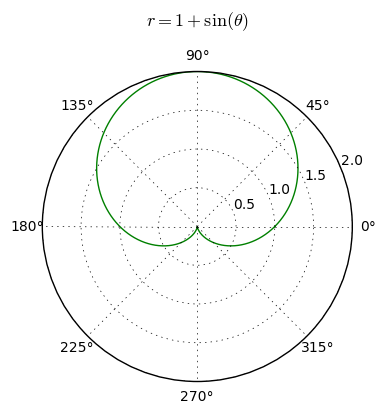

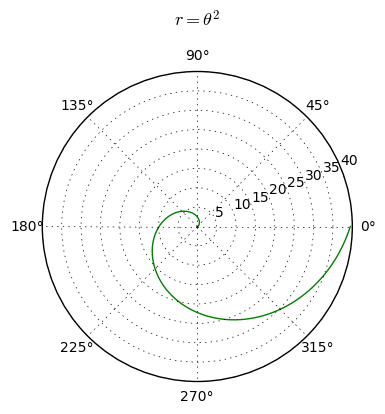

In [418]:
def sin_theta(theta):
    r = np.sin(theta)
    return (r, theta)

def one_plus_sin_theta(theta):
    r = 1 + np.sin(theta)
    return (r, theta)

def theta_square(theta):
    r = theta * theta
    return (r, theta)

def plot_polar(r, theta, title):
    ax = plt.subplot(111, projection = "polar")
    ax.set_xlabel(title, fontsize=13)
    ax.xaxis.set_label_coords(0.5, 1.2) 
    ax.plot(theta, r, color='g')
    plt.show()

theta = np.arange(0, 2 * np.pi, 0.001)

r, theta = sin_theta(theta)
plot_polar(r, theta, r"$r = \sin(\theta)$")

r, theta = one_plus_sin_theta(theta)
plot_polar(r, theta, r"$r = 1 + \sin(\theta)$")

r, theta = theta_square(theta)
plot_polar(r, theta, r"$r = \theta^2$")

## Example 4. 2D coordinates  

Plot points in 3D coordinate system

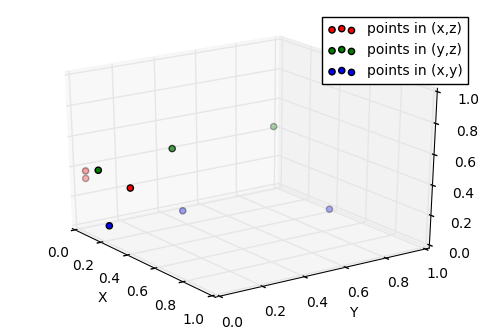

In [556]:
fig = plt.figure()
ax = fig.gca(projection='3d')

def plot_3d(points):
    x = np.random.sample(points)
    z = np.random.sample(points)
    y = np.random.sample(points)

    ax.scatter(x, z, zs=0, zdir='y', c='r', label='points in (x,z)')
    ax.scatter(y, z, zs=0, zdir='x', c='g', label='points in (y,z)')
    ax.scatter(x, y, zs=0, zdir='z', c='b', label='points in (x,y)')

    ax.legend()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    ax.set_zlabel('Z')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax.view_init(elev=25., azim=-35)
    plt.show()

plot_3d(3)

## Example 5. Matrix Operations

Matrix operations:
* Addition
* Multiplication by a scalar
* Matrix multiplication
* Vector dot product (this is a special case of matrix multiplication so we're going to use that)
* Transposing

In [449]:
def add_matrices(m1, m2):
    if len(m1) != len(m2) or len(m1[0]) != len(m2[0]):
        raise ValueError("The dimensions are not the same.")
    rows, cols = len(m1), len(m1[0])
    result = np.zeros((rows, cols))
    for row in range(rows):
        for col in range(cols):
            result[row][col] = m1[row][col] + m2[row][col]
    return result
    
def scale_matrix(matrix, factor):
    rows, cols = len(matrix), len(matrix[0])
    result = np.zeros((rows, cols))
    for row in range(rows):
        for col in range(cols):
            result[row][col] = factor * matrix[row][col]
    return result

def multiply_matrices(m1, m2):
    m1_rows, m1_cols, m2_rows, m2_cols = len(m1), len(m1[0]), len(m2), len(m2[0])
    if m1_cols != m2_rows:
        raise ValueError("The dimensions of the matrices are incompatible.")
    result = np.zeros((m1_rows, m2_cols))
    
    for row in range(len(result)):
        for col in range(len(result[0])):
            for p in range(m1_cols):
                result[row][col] += m1[row][p] * m2[p][col]
    return result
    
def dot_product(v1, v2):
    if len(v1) != len(v2):
        raise ValueError("The vectors must have the same number of elements.")
    result = 0
    for p in range(len(v1)):
        result += v1[p] * v2[p]
    return result

def transpose_matrix(m1):
    rows = len(m1)
    cols = len(m1[0])
    
    #create empty transposing matrix
    result = [[]*rows for _ in range(cols)]

    for row in range(rows):
        for col in range(cols):
            result[col].append(m1[row][col])
 
    return result 

print("Adding matrices: \n",add_matrices([[21, 3, 3], [8, 0, 1]], [[10, -3, 0], [-2, -4, 1]]))
print("Scale matrix: \n",scale_matrix([[2, 1, 7], [0, 1, 1]], 2))
print("Multiply matrices: \n",multiply_matrices([[2, 2, 7], [8, 1, 1]], [[2, 2, 0, 1], [-3, -4, 2, 3], [2, 0, 0, 1]]))
print("Dot product: \n",dot_product([-1, -2, 0, 1], [-6, -4, 0, 3]))
c = [[1, 2, 0, 1],[-3, -4, 1, 3], [2, 0, 1, 1]]
c1 = [[1, -3, 2], [2, -4, 0], [0, 1, 1], [1, 3, 1]]
print("Transpose a matrix - rows into columns and vice-versa:")
print(transpose_matrix(c))
print(transpose_matrix(c1))

Adding matrices: 
 [[ 31.   0.   3.]
 [  6.  -4.   2.]]
Scale matrix: 
 [[  4.   2.  14.]
 [  0.   2.   2.]]
Multiply matrices: 
 [[ 12.  -4.   4.  15.]
 [ 15.  12.   2.  12.]]
Dot product: 
 17
Transpose a matrix - rows into columns and vice-versa:
[[1, -3, 2], [2, -4, 0], [0, 1, 1], [1, 3, 1]]
[[1, 2, 0, 1], [-3, -4, 1, 3], [2, 0, 1, 1]]


## Example 6. Linear System of Equations

Solve a linear matrix equation ($Ax = b$), or system of linear scalar equations.

In [456]:
def solve_linear_system(A, b):
    return np.linalg.solve(A, b)

print(solve_linear_system([[11, 1, 2], [0, -1, -3], [4, -2, -2]], [-7, 5, 20]))

is_correct = np.allclose(np.dot([[11, 1, 2], [0, -1, -3], [4, -2, -2]], [0.04166667, -12.375, 2.45833333]), [-7, 5, 20])
print("Check that the solution is correct: ", is_correct)

[  0.04166667 -12.375        2.45833333]
Check that the solution is correct:  True


##  Example 7.  Inverse of a Matrix

Finding the inverse of a matrix.

The inverse of a matrix, $A^-1$ is a matrix which satisfies $AA^-1=\mathbb{E}$.

In [463]:
def get_inverse(a):
    return np.linalg.inv(a)

print(get_inverse([[-2, 1, 0], [3, 3, -1], [2, 3, 4]]))

[[-0.34090909  0.09090909  0.02272727]
 [ 0.31818182  0.18181818  0.04545455]
 [-0.06818182 -0.18181818  0.20454545]]


##  Example 8.  Graphing Functions

Graph the following functions:

Linear: $y= ax + b$ <br>
Quadratic: $y = ax^2 - bx + c$ <br>
Trigonometric: $y = a\sin(bx + c)$ <br>
Exponential: $y = ae^{bx}$ <br>
Special: $y = \frac{\sin(x)}{x}$ <br>


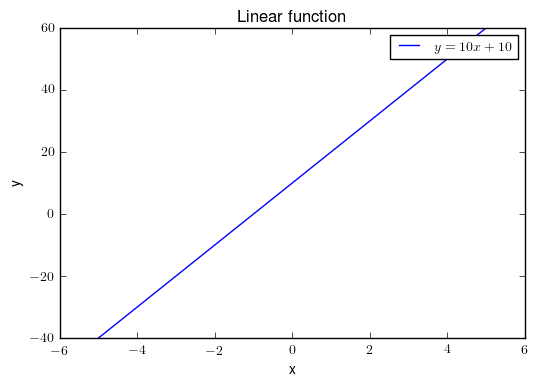

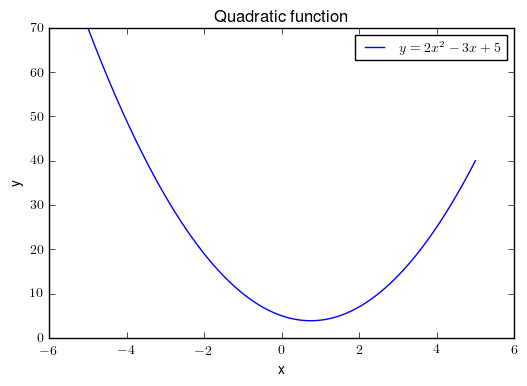

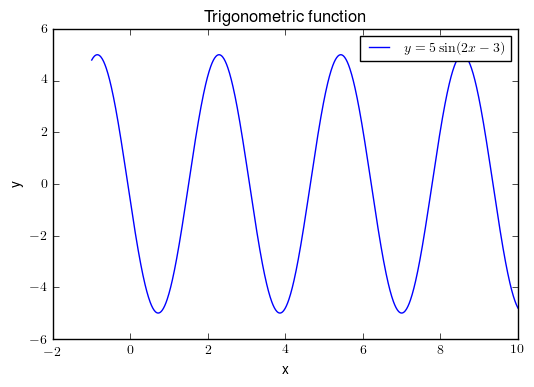

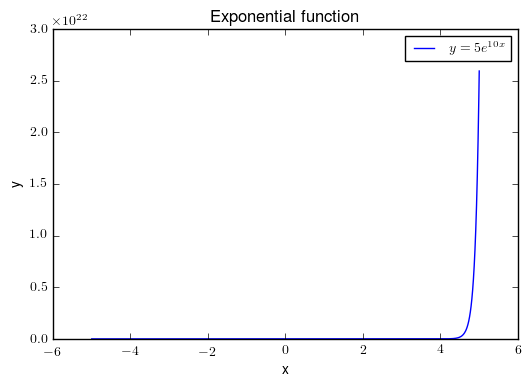

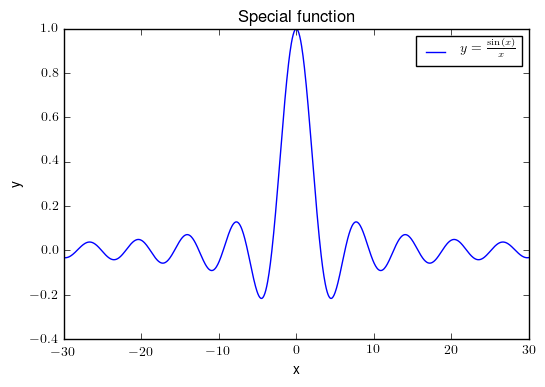

In [587]:
plt.rcParams["text.usetex"] = True
def plot_function(f, min_x, max_x, label, title, num_points = 1000):
    x = np.linspace(min_x, max_x, num_points)
    y = f(x)
    plt.figure()
    plt.plot(x, y, label = label)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    
plot_function(lambda x: 10 * x + 10, -5, 5, r"$y = 10x + 10$", "Linear function")
plot_function(lambda x: 2 * x ** 2 - 3 * x + 5, -5, 5, r"$y = 2x^2 - 3x + 5$", "Quadratic function")
plot_function(lambda x: 5 * np.sin(2 * x - 3), -1, 10, r"$y = 5\sin(2x -3)$", "Trigonometric function")
plot_function(lambda x: 5 * np.exp(10 * x), -5, 5, r"$y = 5e^{10x}$", "Exponential function")
plot_function(lambda x: np.sin(x) / x, -30, 30, r"$y = \frac{\sin(x)}{x}$", "Special function")

## 9. Calculating Derivatives

Ploting the derivative of the real function. The derivative of $y = \sin(x)$ is $y' = \cos(x)$.

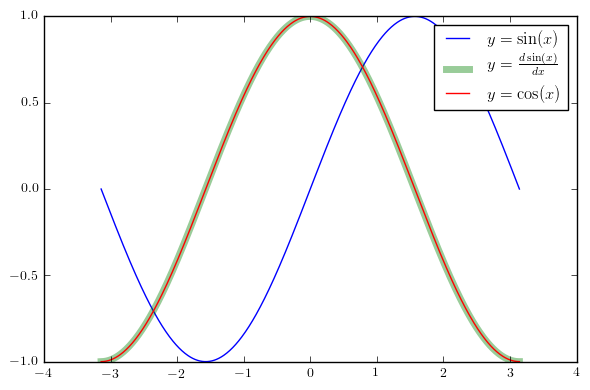

In [13]:
def differentiate(x, y):
    dy = np.zeros(y.shape,np.float)
    dy[0:-1] = np.diff(y)/np.diff(x)  
    dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
    return dy

x = np.linspace(-math.pi, math.pi, 700)
y = np.sin(x)
y_prime = differentiate(x, y)

plt.rcParams["text.usetex"] = True
plt.plot(x, y, label = r"$y = \sin(x)$")
plt.plot(x, y_prime, label = r"$y = \frac{d\sin(x)}{dx}$", linewidth=5, alpha=0.4)
plt.plot(x, np.cos(x), label = r"$y = \cos(x)$")
plt.legend()
plt.tight_layout()
plt.show()

## 10. Calculating Integrals

We will use the trapezoidal rule as a method for calculation/approximating the definite integral.

***
Below are calculated the following integrals: 

$$
\int_0^\pi \sin(x)dx \\
\int_{-\pi}^\pi \sin(x)dx \\
\int_0^\pi e^{\sin(x)}dx \\
\int_0^\pi \sin^3(x)cos^2(x)dx
$$ 


Note that the function inside the library accepts the parameters in reverse order.

In [618]:
def integrate(f):
    return round(np.trapz(f[1], f[0]), 4)

x = np.linspace(0, math.pi, 1000)
y = np.sin(x)
print(integrate([x, y]))

x = np.linspace(-math.pi, math.pi, 1000)
y = np.sin(x)
print(integrate([x, y]))

x = np.linspace(0, math.pi, 1000)
y = np.exp(np.sin(x))
print(integrate([x, y]))

x = np.linspace(0, math.pi, 1000)
y = np.sin(x) ** 3 * np.cos(x) ** 2
print(integrate([x, y]))

2.0
0.0
6.2088
0.2667


## 10. Gradient Descent
Gradient descent is a simple method for finding local extrema of a function. It uses the derivative to find where it equals zero. We're going to implement a simple version of that.

We can extend this code easily. For example, we may want to check whether the extremum is minimum or maximum (in the example we know it's a minimum from other sources). To do that, we can check the second derivative.

In [1]:
x_old = 0 # abs(x_new - x_old) > precision
x_new = 6
step_size = 0.01 # step size
precision = 0.00001

# x^4 - 3x^3 + 2
def df(x):
    y = 4 * x**3 - 9 * x**2
    return y

def df2(x):
    # f''(4x^3 - 9x^2) = 12x^2 - 18x
    y = 12 * x**2 - 18 * x
    return y

while abs(x_new - x_old) > precision:
    x_old = x_new 
    gradient = df(x_old) 
    move = gradient * step_size
    x_new = x_old - move
    
    
print("Local minimum occurs at {}".format(str(round(x_new, 4))))


Local minimum occurs at 2.25
